Importation des Bibliotheques necessaires 

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# The Head of the Dataset

In [70]:
df = pd.read_csv('titanic-passengers.csv', encoding= 'ISO-8859-1',sep=';')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


<h1>COMPREHENSION DE LA DATAFRAME</h1>
<ul>
    <li><strong>PassengerId :</strong>le numero qui identifie uniquement un passager</li>
    <li><strong>Survided:</strong>Possibilité de survie du passager</li>
    <li><strong>PClass:</strong>Classe dans laquelle le passager a voyagé</li>
    <li><strong>Name:</strong>Nom du Passager</li>
    <li><strong>Sexe:</strong>Sexe du passager</li>
    <li><strong>Age:</strong>Age du passager</li>
    <li><strong>Parch:</strong>Parchemin dans lequel etait le passager</li>
    <li><strong>Ticket:</strong>numero qui identifie le ticket du passager</li>
    <li><strong>Embarqué:</strong>Certitude d'embarquation du passager </li>
</ul>

# Data Preprocessing Phase

Avoir la totalité des colonnes vides dans chaques elements de la dataframe

In [45]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Description de la dataframe

In [46]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Nombre de colonnes

In [47]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Types de données de chaque colonnes

In [16]:
df.dtypes

PassengerId      int64
Survived        object
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Nettoyage de la DataFrame

<li><strong>Les tableaux avec des valeurs manquantes sont Age,Cabin et Embarked. supprimer les lignes cabin,PassengerID,Ticket qui a mon avis n'est pas utile vu le nombre de données manquantes. et nous allons remplacer les valeurs manquantes de Age par la moyenne d'age des passagers et ensuite remplacer les valeurs nulles presente dans Embarked par la moyenne de l'ensemble de valeur </strong></li>


In [71]:
df = df.drop(columns=['PassengerId','Ticket','Cabin'])

In [72]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,13.0000,S
1,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,7.6500,S
2,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,7.8542,S
3,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,21.0750,S
4,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,52.0000,S


Remplacement des Valeurs Manquantes de Age par la moyenne.

In [73]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [74]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

Remplacer Embarqué par l'element majoritaire

In [75]:
df['Embarked'].isnull().sum()

2

In [76]:
df['Embarked'] = df['Embarked'].fillna(2)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,13.0000,S
1,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,7.6500,S
2,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,7.8542,S
3,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,21.0750,S
4,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,52.0000,S


In [68]:
df['Embarked'].isnull().sum()

0

Remplacer les données en caractere par des valeurs numériques

In [77]:
df['Sex'] = df['Sex'].map({'male':0, 'female':1})
df['Embarked'] = df['Embarked'].map({'C':0, 'Q':1, 'S':2})
df['Survived'] = df['Survived'].map({'Yes':0, 'No':1})

In [78]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,13.0000,2.0
1,1,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,7.6500,2.0
2,1,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,7.8542,2.0
3,1,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,21.0750,2.0
4,1,1,"Davidson, Mr. Thornton",0,31.0,1,0,52.0000,2.0


# Visualisation Process

Commencez par étudier la distribution des caractéristiques les plus importantes en fonction de votre compréhension de l'ensemble de données et du problème.

In [81]:
df.Survived.value_counts()

1    549
0    342
Name: Survived, dtype: int64

Tableau presentant le nombre de personnes qui sont survecu a l'attaque et ceux qui sont decédés

Text(0, 0.5, 'Passenger Count')

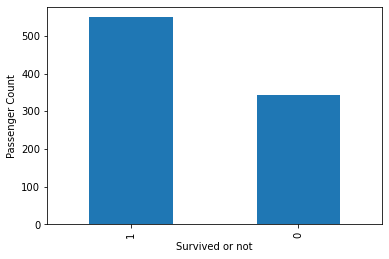

In [84]:
plt = df.Survived.value_counts().plot(kind='bar')
plt.set_xlabel('Survived or not')
plt.set_ylabel('Passenger Count')

In [85]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Nombre de personnes reparties dans chaque classe du bateau

<AxesSubplot:xlabel='Pclass', ylabel='count'>

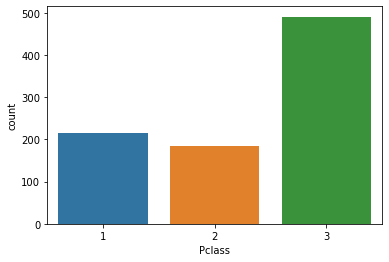

In [89]:
sns.countplot(x="Pclass",data=df)

Diagramme a bar delimitant les sexes de chaque voyageurs

<AxesSubplot:xlabel='Sex', ylabel='count'>

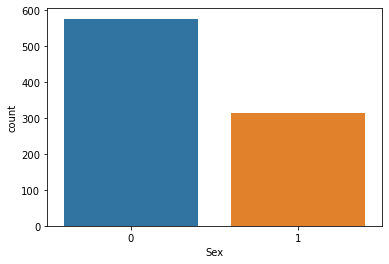

In [91]:
sns.countplot(x="Sex",data=df)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

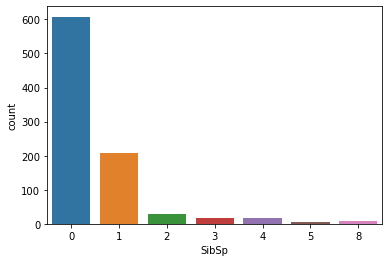

In [93]:
sns.countplot(x="SibSp",data=df)

<AxesSubplot:xlabel='Parch', ylabel='count'>

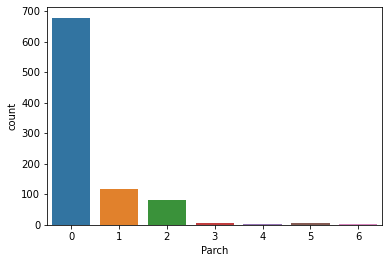

In [94]:
sns.countplot(x="Parch",data=df)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

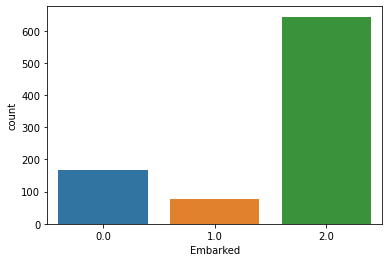

In [96]:
sns.countplot(x="Embarked",data=df)

Tableau presentant la probabilité de survie d'un passager par rapport aux nombres de parent avec qui il voyage

Text(0, 0.5, 'Survival Probability')

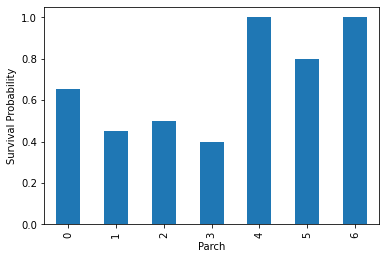

In [102]:
plt = df[['Parch', 'Survived']].groupby('Parch').mean().Survived.plot(kind='bar')
plt.set_xlabel('Parch')
plt.set_ylabel('Survival Probability')

Graphique montrant les chances de survie d'un passager par rapport a son lieu d'embarquement 

Text(0, 0.5, 'Passenger count')

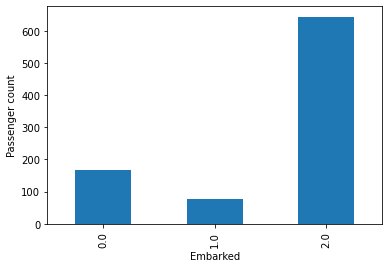

In [106]:
plt = df.Embarked.value_counts().sort_index().plot(kind='bar')
plt.set_xlabel('Embarked')
plt.set_ylabel('Passenger count')

In [128]:
plt.hist(df['Age'])

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

In [127]:
plt.hist(df['Sex'])

(array([577.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 314.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

In [138]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

In [154]:
def plot_correlation_map(df):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

In [162]:
plot_correlation_map(df)

AttributeError: 'AxesSubplot' object has no attribute 'subplots'

Use the groupby function combined with the mean() to view the relation between Pclass and survived 

In [143]:
df[["Survived", "SibSp","Parch"]].groupby(["Survived"], as_index=True).mean()

,SibSp,Parch
Survived,,
0,0.473684,0.464912
1,0.553734,0.329690


<h3>CREATION DE LA VARIABLE TITRE</h3>


In [156]:
dt_titre = df['Name'].copy()

# dt_titre.set_axis('Titre',axis='columns',inplace=True)

In [157]:
for i in dt_titre : 
    dt_titres=pd.DataFrame(dt_titre.str.extract(' ([A-Za-z]+)\.', expand=False))

In [158]:
dt_titres.rename(columns={'Name':'Titre'},inplace=True)

In [159]:
df=pd.concat([df,dt_titres],axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Titre
0,1,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,13.0000,2.0,Mr
1,1,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,7.6500,2.0,Mr
2,1,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,7.8542,2.0,Mr
3,1,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,21.0750,2.0,Mrs
4,1,1,"Davidson, Mr. Thornton",0,31.0,1,0,52.0000,2.0,Mr


In [165]:
df_encoders=pd.concat([dt_titres,df],axis=1)
df_encoders.head()

,Titre,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Titre
0,Mr,1,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,13.0000,2.0,Mr
1,Mr,1,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,7.6500,2.0,Mr
2,Mr,1,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,7.8542,2.0,Mr
3,Mrs,1,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,21.0750,2.0,Mrs
4,Mr,1,1,"Davidson, Mr. Thornton",0,31.0,1,0,52.0000,2.0,Mr


Use the groupby function combined with the mean() to view the relation between Pclass and survived 

In [167]:
df[["Titre", "Age"]].groupby(["Titre"], as_index=True).mean()

,Age
Titre,
Capt,70.000000
Col,58.000000
Countess,33.000000
Don,40.000000
Dr,40.242731
Jonkheer,38.000000
Lady,48.000000
Major,48.500000
Master,7.086662


In [169]:
df[["Titre", "Sex"]].groupby(["Titre"], as_index=True).mean()

,Sex
Titre,
Capt,0.000000
Col,0.000000
Countess,1.000000
Don,0.000000
Dr,0.142857
Jonkheer,0.000000
Lady,1.000000
Major,0.000000
Master,0.000000


In [170]:
df[["Titre", "Fare"]].groupby(["Titre"], as_index=True).mean()

,Fare
Titre,
Capt,71.000000
Col,31.025000
Countess,86.500000
Don,27.720800
Dr,49.168457
Jonkheer,0.000000
Lady,39.600000
Major,28.525000
Master,34.703125


In [171]:
Titre_Dictionnaire = {

                    "Capt": "Officier",

                    "Col": "Officier",

                    "Major": "Officier",

                      "Dr": "Officier",

                    "Rév": "Officier",

                    "Jonkheer": "Redevance",

                    "Don": "Redevance",

                    "Monsieur" : "Royauté",

                   "Dame" : "Royauté",

                  "la Comtesse": "Royauté",

                    "Dona": "Royauté",

                    "Mme": "Madame",

                    "Mlle": "Madame",

                    "Madame" : "Madame",

                    "Mlle": "Mme",

                    "Monsieur": "Madame",

                    "Mme" : "Mme",

                    "Maître" : "Maître"

                    }

In [172]:
dt_titres_trait=dt_titres
dt_titres_trait.head()

,Titre
0,Mr
1,Mr
2,Mr
3,Mrs
4,Mr


In [173]:
for name in Titre_Dictionnaire :
    for i in dt_titres_trait :
#         if name == dt_titres_trait[i]:
            print(dt_titres_trait[i])


0        Mr
1        Mr
2        Mr
3       Mrs
4        Mr
       ... 
886     Mrs
887      Mr
888    Miss
889      Mr
890    Miss
Name: Titre, Length: 891, dtype: object
0        Mr
1        Mr
2        Mr
3       Mrs
4        Mr
       ... 
886     Mrs
887      Mr
888    Miss
889      Mr
890    Miss
Name: Titre, Length: 891, dtype: object
0        Mr
1        Mr
2        Mr
3       Mrs
4        Mr
       ... 
886     Mrs
887      Mr
888    Miss
889      Mr
890    Miss
Name: Titre, Length: 891, dtype: object
0        Mr
1        Mr
2        Mr
3       Mrs
4        Mr
       ... 
886     Mrs
887      Mr
888    Miss
889      Mr
890    Miss
Name: Titre, Length: 891, dtype: object
0        Mr
1        Mr
2        Mr
3       Mrs
4        Mr
       ... 
886     Mrs
887      Mr
888    Miss
889      Mr
890    Miss
Name: Titre, Length: 891, dtype: object
0        Mr
1        Mr
2        Mr
3       Mrs
4        Mr
       ... 
886     Mrs
887      Mr
888    Miss
889      Mr
890    Miss
Name: Ti

Finally, use the Parch and the SibSp columns to create a more useful feature, let's call it FamilySize.

In [181]:
FamilySize = df[['Parch','SibSp']]
FamilySize.head()

In [182]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Titre,FamilySize
0,1,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,13.0000,2.0,Mr,1
1,1,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,7.6500,2.0,Mr,1
2,1,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,7.8542,2.0,Mr,1
3,1,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,21.0750,2.0,Mrs,5
4,1,1,"Davidson, Mr. Thornton",0,31.0,1,0,52.0000,2.0,Mr,2
